In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

c:\Users\vishwa\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("sandwich.csv")  

In [3]:
print(df.describe(include='all'))

         antCount bread           topping butter
count   48.000000    48                48     48
unique        NaN     4                 3      2
top           NaN   Rye  Ham and gherkins     no
freq          NaN    12                16     24
mean    43.500000   NaN               NaN    NaN
std     15.148906   NaN               NaN    NaN
min     18.000000   NaN               NaN    NaN
25%     30.500000   NaN               NaN    NaN
50%     43.000000   NaN               NaN    NaN
75%     57.000000   NaN               NaN    NaN
max     76.000000   NaN               NaN    NaN


In [ ]:
import pandas as pd

df = pd.read_csv('sandwich.csv')

ant_count_median = df['antCount'].median()

print(f"The median of the ant count is: {ant_count_median}")


The median of the ant count is: 43.0


In [4]:
group_means = df.groupby(['bread', 'topping', 'butter'])['antCount'].mean().unstack()
print(group_means)

butter                          no   yes
bread       topping                     
Multi Grain Ham and gherkins  47.5  69.5
            Peanut butter     20.5  53.5
            Yeast spread      40.0  27.0
Rye         Ham and gherkins  49.5  49.5
            Peanut butter     53.0  39.0
            Yeast spread      25.0  49.5
White       Ham and gherkins  49.0  66.0
            Peanut butter     42.0  38.5
            Yeast spread      24.5  33.5
Whole Grain Ham and gherkins  50.5  62.5
            Peanut butter     22.5  54.0
            Yeast spread      33.5  44.0


Aggregated Data by Bread:
         bread  totalAnts
0  Multi Grain        516
1          Rye        531
2        White        507
3  Whole Grain        534

Mean Ant Count by Bread:
         bread  meanAnts
0  Multi Grain     43.00
1          Rye     44.25
2        White     42.25
3  Whole Grain     44.50


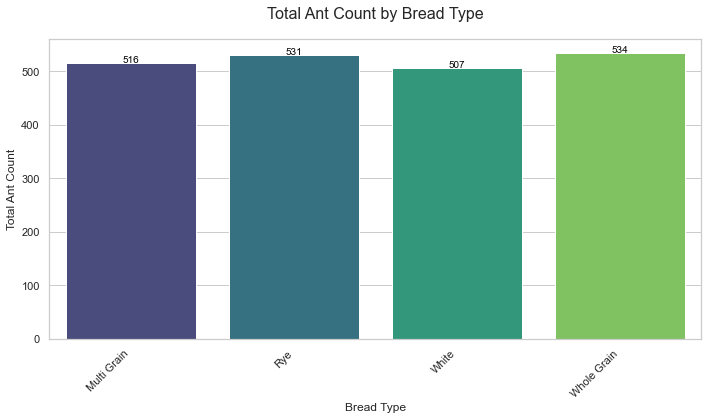


Aggregated Data by Topping:
            topping  totalAnts
0  Ham and gherkins        888
1     Peanut butter        646
2      Yeast spread        554

Mean Ant Count by Topping:
            topping  meanAnts
0  Ham and gherkins    55.500
1     Peanut butter    40.375
2      Yeast spread    34.625


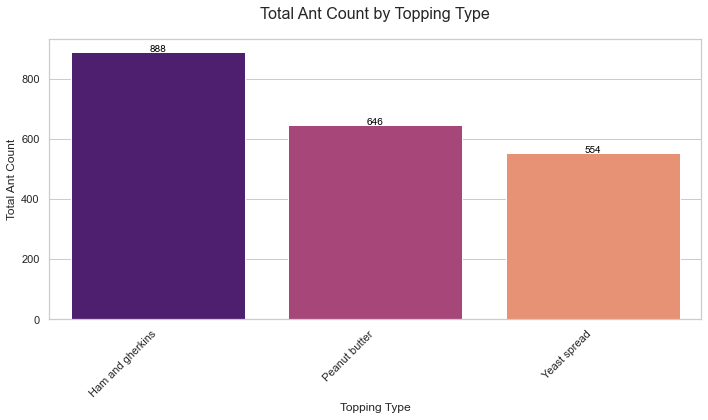


Aggregated Data by Butter Presence:
  butter  totalAnts
0     no        915
1    yes       1173

Mean Ant Count by Butter Presence:
  butter  meanAnts
0     no    38.125
1    yes    48.875


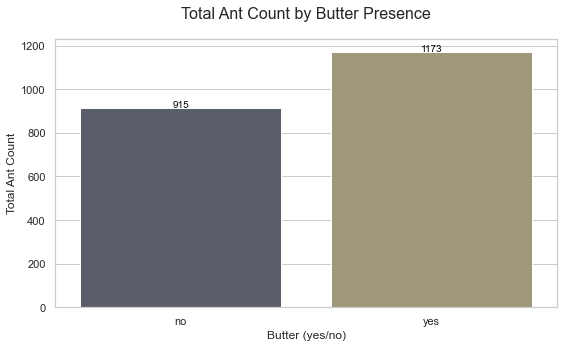

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("sandwich.csv")
df['antCount'] = pd.to_numeric(df['antCount'], errors='coerce').fillna(0)

aggregated_bread_data = df.groupby('bread')['antCount'].sum().reset_index()
aggregated_bread_data.rename(columns={'antCount': 'totalAnts'}, inplace=True)

mean_bread_data = df.groupby('bread')['antCount'].mean().reset_index()
mean_bread_data.rename(columns={'antCount': 'meanAnts'}, inplace=True)


print("Aggregated Data by Bread:")
print(aggregated_bread_data)
print("\nMean Ant Count by Bread:")
print(mean_bread_data)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='bread', y='totalAnts', data=aggregated_bread_data, palette='viridis')
plt.title('Total Ant Count by Bread Type', fontsize=16, pad=20)
plt.xlabel('Bread Type', fontsize=12)
plt.ylabel('Total Ant Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
for index, row in aggregated_bread_data.iterrows():
    plt.text(index, row['totalAnts'] + 0.5,
             f"{int(row['totalAnts'])}",
             color='black', ha="center", fontsize=10)
plt.tight_layout()
plt.show()



aggregated_topping_data = df.groupby('topping')['antCount'].sum().reset_index()
aggregated_topping_data.rename(columns={'antCount': 'totalAnts'}, inplace=True)

mean_topping_data = df.groupby('topping')['antCount'].mean().reset_index()
mean_topping_data.rename(columns={'antCount': 'meanAnts'}, inplace=True)

print("\nAggregated Data by Topping:")
print(aggregated_topping_data)
print("\nMean Ant Count by Topping:")
print(mean_topping_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='topping', y='totalAnts', data=aggregated_topping_data, palette='magma') # Different palette for distinction
plt.title('Total Ant Count by Topping Type', fontsize=16, pad=20)
plt.xlabel('Topping Type', fontsize=12)
plt.ylabel('Total Ant Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
for index, row in aggregated_topping_data.iterrows():
    plt.text(index, row['totalAnts'] + 0.5,
             f"{int(row['totalAnts'])}",
             color='black', ha="center", fontsize=10)
plt.tight_layout()
plt.show()


aggregated_butter_data = df.groupby('butter')['antCount'].sum().reset_index()
aggregated_butter_data.rename(columns={'antCount': 'totalAnts'}, inplace=True)

mean_butter_data = df.groupby('butter')['antCount'].mean().reset_index()
mean_butter_data.rename(columns={'antCount': 'meanAnts'}, inplace=True)

print("\nAggregated Data by Butter Presence:")
print(aggregated_butter_data)
print("\nMean Ant Count by Butter Presence:")
print(mean_butter_data)

plt.figure(figsize=(8, 5)) 
sns.barplot(x='butter', y='totalAnts', data=aggregated_butter_data, palette='cividis') 
plt.title('Total Ant Count by Butter Presence', fontsize=16, pad=20)
plt.xlabel('Butter (yes/no)', fontsize=12)
plt.ylabel('Total Ant Count', fontsize=12)
plt.xticks(rotation=0)
for index, row in aggregated_butter_data.iterrows():
    plt.text(index, row['totalAnts'] + 0.5,
             f"{int(row['totalAnts'])}",
             color='black', ha="center", fontsize=10)
plt.tight_layout()
plt.show()


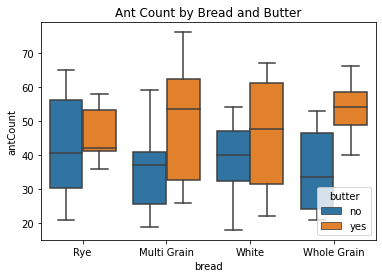

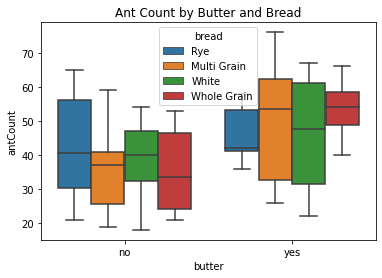

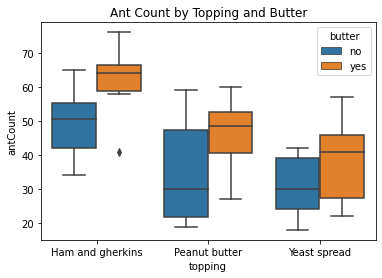

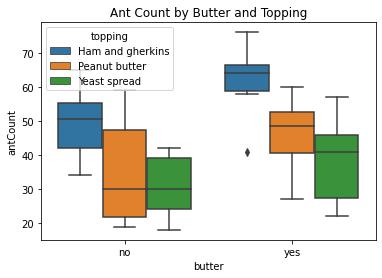

In [15]:
sns.boxplot(x="bread", y="antCount", hue="butter", data=df)
plt.title("Ant Count by Bread and Butter")
plt.show()
sns.boxplot(x="butter", y="antCount", hue="bread", data=df)
plt.title("Ant Count by Butter and Bread")
plt.show()
sns.boxplot(x="topping", y="antCount", hue="butter", data=df)
plt.title("Ant Count by Topping and Butter")
plt.show()
sns.boxplot(x="butter", y="antCount", hue="topping", data=df)
plt.title("Ant Count by Butter and Topping")
plt.show()

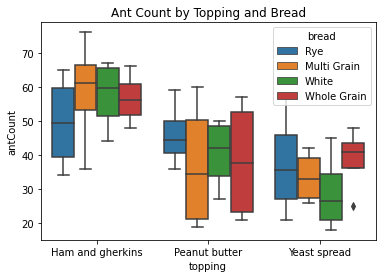

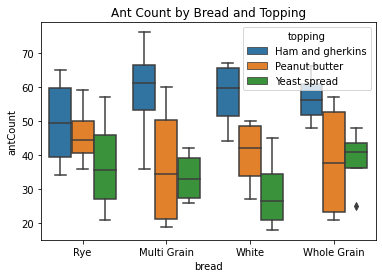

In [16]:
sns.boxplot(x="topping", y="antCount", hue="bread", data=df)
plt.title("Ant Count by Topping and Bread")
plt.show()
sns.boxplot(x="bread", y="antCount", hue="topping", data=df)
plt.title("Ant Count by Bread and Topping")
plt.show()

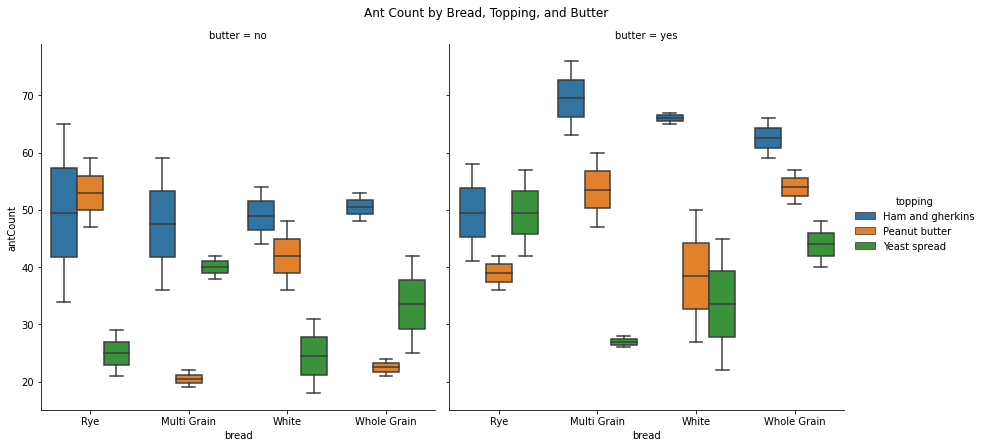

In [ ]:
g = sns.catplot(
    data=df,
    x="bread",
    y="antCount",
    hue="topping",
    col="butter", 
    kind="box",    
    height=6,
    aspect=1
)


g.fig.suptitle("Ant Count by Bread, Topping, and Butter", y=1.03) n

plt.show()



In [4]:
shapiro_test = stats.shapiro(df['antCount'])
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

Shapiro-Wilk p-value: 0.19344866275787354


Since the p-value (0.1934) is greater than the significance level (0.05),There is no significant evidence to suggest that the data is not normally distributed. Therefore, we can assume normality for this variable.

In [5]:
from scipy.stats import levene

print("Levene Test (Bread):", levene(*[group["antCount"].values for name, group in df.groupby("bread")]))
print("Levene Test (Topping):", levene(*[group["antCount"].values for name, group in df.groupby("topping")]))
print("Levene Test (Butter):", levene(*[group["antCount"].values for name, group in df.groupby("butter")]))

Levene Test (Bread): LeveneResult(statistic=0.5266017592551805, pvalue=0.6663192138106316)
Levene Test (Topping): LeveneResult(statistic=0.6345064949483735, pvalue=0.5348737286294802)
Levene Test (Butter): LeveneResult(statistic=0.0014152539765560303, pvalue=0.9701535633952737)


For all three categorical variables (bread, topping, and butter), Levene’s Test shows no significant difference in group variances. Therefore, the assumption of equal variances holds, we can proceed with ANOVA test

In [9]:
model = ols('antCount ~ C(bread) * C(topping) * C(butter)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

                                sum_sq    df          F    PR(>F)
C(bread)                         40.50   3.0   0.142043  0.933761
C(topping)                     3720.50   2.0  19.572994  0.000009
C(butter)                      1386.75   1.0  14.590969  0.000830
C(bread):C(topping)             577.00   6.0   1.011837  0.440987
C(bread):C(butter)              378.75   3.0   1.328365  0.288413
C(topping):C(butter)             56.00   2.0   0.294608  0.747479
C(bread):C(topping):C(butter)  2345.50   6.0   4.113108  0.005597
Residual                       2281.00  24.0        NaN       NaN


Topping and butter each have significant individual effects on the number of ants .

Bread alone does not influence antCount significantly.

There is a significant 3-way interaction between bread, topping, and butter, suggesting that the combined influence of these three variables together does affect Count in a non-additive way.

No significant 2-way interactions were found between any pairs of variables.

In [9]:
tukey_topping = pairwise_tukeyhsd(endog=df['antCount'], groups=df['topping'], alpha=0.05)
print(tukey_topping.summary())

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
Ham and gherkins Peanut butter  -15.125 0.0038 -25.862  -4.388   True
Ham and gherkins  Yeast spread  -20.875 0.0001 -31.612 -10.138   True
   Peanut butter  Yeast spread    -5.75 0.4037 -16.487   4.987  False
---------------------------------------------------------------------


In [10]:
tukey_bread = pairwise_tukeyhsd(endog=df['antCount'], groups=df['bread'], alpha=0.05)
print(tukey_bread.summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Multi Grain         Rye     1.25 0.9973 -15.7843 18.2843  False
Multi Grain       White    -0.75 0.9994 -17.7843 16.2843  False
Multi Grain Whole Grain      1.5 0.9954 -15.5343 18.5343  False
        Rye       White     -2.0 0.9892 -19.0343 15.0343  False
        Rye Whole Grain     0.25    1.0 -16.7843 17.2843  False
      White Whole Grain     2.25 0.9848 -14.7843 19.2843  False
---------------------------------------------------------------


In [11]:
tukey_bread = pairwise_tukeyhsd(endog=df['antCount'], groups=df['butter'], alpha=0.05)
print(tukey_bread.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    no    yes    10.75 0.0123 2.4439 19.0561   True
---------------------------------------------------


In [12]:
df['group'] = df['bread'] + " | " + df['topping'] + " | " + df['butter']

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(endog=df['antCount'], groups=df['group'], alpha=0.05)

result=pd.DataFrame(tukey_result.summary())
result.to_csv("tukey_results.csv")

In [13]:
categorical_columns = ['bread', 'topping', 'butter']
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:
        contingency = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, _ = stats.chi2_contingency(contingency)
        print(f"{col1} × {col2}: Chi2={chi2:.4f}, p={p:.4f}, dof={dof}")

bread × topping: Chi2=0.0000, p=1.0000, dof=6
bread × butter: Chi2=0.0000, p=1.0000, dof=3
topping × butter: Chi2=0.0000, p=1.0000, dof=2


Since the p-values = 1.000 in all cases, there's no evidence of dependency between these factor combinations in how the categories are distributed.

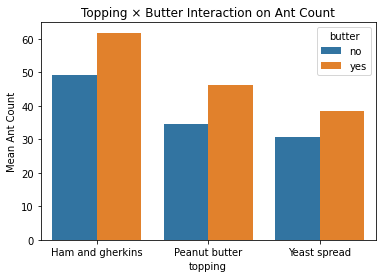

In [14]:
interaction_means = df.groupby(['topping', 'butter'])['antCount'].mean().reset_index()
sns.barplot(data=interaction_means, x='topping', y='antCount', hue='butter')
plt.title('Topping × Butter Interaction on Ant Count')
plt.ylabel('Mean Ant Count')
plt.show()


Residual Analysis


In [23]:
model = ols('antCount ~ C(bread) * C(topping) * C(butter)', data=df).fit()


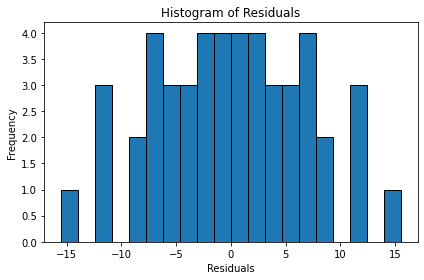

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(model.resid, bins=20, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


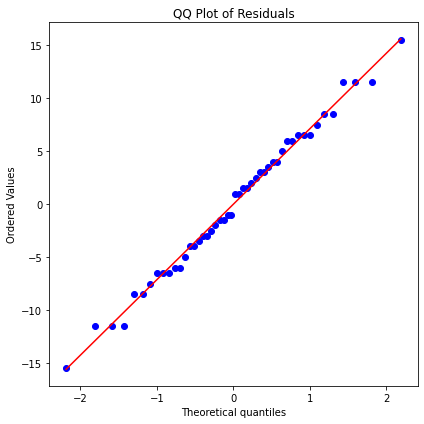

In [25]:
import scipy.stats as stats
residuals = model.resid
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()


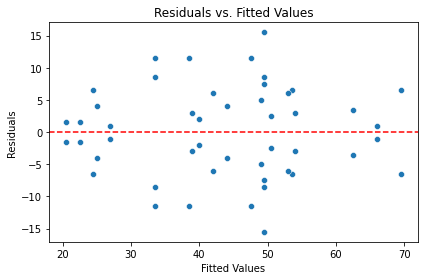

In [26]:
fitted_vals = model.fittedvalues

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


All key assumptions for ANOVA (normality, homogeneity of variance, and independence) are reasonably satisfied.

ANOVA and Tukey HSD results are valid and interpretable.

Final conclusion:
Descryptive analysis
    Bar Plot Insights
    Ham & Gherkins topping shows highest mean ant count

    Yeast Spread attracts the least

    Butter increases attraction on average
Inferential analysis
    Topping and butter significantly effect ant attraction.

    Bread does not effect much.

    There is a significant three-way interaction, suggesting the full combination of factors affects results.
After Tukey test:
Ham & Gherkins attracted significantly more ants than the other two toppings.
Butter attracts significantly more ants on average.





Conclusion
This comprehensive analysis demonstrates that ant attraction to sandwiches is a complex phenomenon driven by the intricate interactions among bread type, topping, and butter presence. While topping type and butter presence individually exert significant main effects on ant counts, the most critical finding is the strong statistically significant three-way interaction. This interaction fundamentally shifts the understanding of ant foraging preferences from simple additive effects to context-dependent, synergistic, and sometimes antagonistic relationships between ingredients.The report concludes that:
Topping, particularly Ham and gherkins, is a primary driver of ant attraction.
The presence of butter significantly increases attraction.
Bread type, while not significant on its own, plays a crucial role in synergistic combinations, with Multi Grain bread (especially with Ham and gherkins and butter) identified as a key component in the most attractive sandwich formulation.
Do the type of bread, the topping, and butter have a significant influence on the amount of attracted ants?
Topping and Butter significantly influence ant attraction (p<0.001 for both).
Bread Type does not have a significant main effect (p=0.934).
However, a significant three-way interaction (Bread × Topping × Butter, p<0.05) indicates that the effect of one ingredient depends on the specific combination of the others, making their influence complex and interdependent. Two-way interactions were not significant.
Which type of bread and which topping do attract the most ants?
Topping: Ham and gherkins attract the most ants (mean: 55.5) compared to Peanut butter (40.375) and Yeast spread (34.625).
Bread Type: While no single bread type attracts the most ants overall, Multi Grain bread is a key component in the most attractive combination: Multi Grain bread with Ham and gherkins and butter (mean: 69.5 ants).
Ultimately, the study provides precise, empirically-derived insights into how to either maximize or minimize ant attraction by leveraging specific ingredient combinations, thereby contributing valuable knowledge to both entomological research and practical pest management.
